1. [Import Libraries](#import-libraries)
2. [Data Loading](#data-loading)
3. [Data Cleaning](#data-cleaning)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Visualisasi 1](#visualisasi-1)
    - [Visualisasi 2](#visualisasi-2)
    - [Visualisasi 3](#visualisasi-3)
    - [Visualisasi 4](#visualisasi-4)
    - [Insight Statistika Deskriptif](#insight-statistik-deskriptif)
    - [Insight Statistika Inferensial](#insight-statistika-inferensial)


## 1. Import Libraries

memanggil library yang penting

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## 2. Data Loading

In [2]:
# Membaca file CSV
df= pd.read_csv('dataset_games.csv')

In [3]:
# Menampilkan lima baris pertama
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


terdapat banyak nilai NaAN pada data

In [4]:
# Menampilkan informasi dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

In [5]:
# Menampilkan statistik deskriptif dari DataFrame
df.describe()

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16655.00000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,7718.000000
mean,8463.500000,2006.48532,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,163.269629
std,4886.837014,5.88289,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,562.786746
min,0.000000,1980.00000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4231.750000,2003.00000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8463.500000,2007.00000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,25.000000
75%,12695.250000,2010.00000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,82.000000
max,16927.000000,2020.00000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [6]:
# menampilkan jumlah nilai kosong dalam dataframe
df.isnull().sum()


index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count         9210
Developer          6688
Rating             6836
dtype: int64

In [7]:
# menampilkan jumlah baris duplikat dalam dataframe
df.duplicated().sum()


0

## 3. Data Cleaning 

dilakukan penghapusan pada kolom critic score, critic count, user score, user count <br>
alas penghapusan karena pengambilan data akan difokuskan hanya pada penjualan game<br>
nama kolom terdapat simbol '_' maka perlu dihilangkan dan ubah nama kolom 'Name' menjadi 'Games' untuk mempermudah pembaca <br>
pengubahan tipe data pada kolom year of release dari float menjadi integer

In [8]:
# Ubah nama kolom "Name" menjadi "Games"
df = df.rename(columns={'Name': 'Games'})

# Mengganti karakter underscore ('_') dengan spasi (' ') pada semua kolom
df.columns = df.columns.str.replace('_', ' ')

# Hapus kolom-kolom yang tidak diperlukan
df.drop(["Critic Score", "Critic Count", "User Score", "User Count"], axis=1, inplace=True)


In [9]:
df['Year of Release'] = df['Year of Release'].fillna(0).astype(int)

In [10]:
# Menghapus baris yang mengandung nilai NaN
df = df.dropna()

In [11]:
# Mengatur ulang indeks dataframe 
df.reset_index(drop=True, inplace=True)

In [104]:
df.to_csv('Clear_Games.csv', index=False)

In [96]:
df

,index,Games,Platform,Year of Release,Genre,Publisher,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo,E
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo,E
6,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,Nintendo,E
7,7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16922,16922,Wave Race: Blue Storm,GC,2001,Racing,Nintendo,0.40,0.10,0.09,0.02,0.60,Nintendo,E
16923,16923,Aliens: Colonial Marines,PS3,2013,Shooter,Sega,0.20,0.29,0.00,0.11,0.60,Gearbox Software,M
16924,16924,Backyard Wrestling: Don't Try This at Home,PS2,2003,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.60,Paradox Development,M
16925,16925,Yakuza: Dead Souls,PS3,2011,Shooter,Sega,0.09,0.06,0.42,0.03,0.60,Ryu ga Gotoku Studios,M


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9906 entries, 0 to 16926
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            9906 non-null   int64  
 1   Games            9906 non-null   object 
 2   Platform         9906 non-null   object 
 3   Year of Release  9906 non-null   int64  
 4   Genre            9906 non-null   object 
 5   Publisher        9906 non-null   object 
 6   NA Sales         9906 non-null   float64
 7   EU Sales         9906 non-null   float64
 8   JP Sales         9906 non-null   float64
 9   Other Sales      9906 non-null   float64
 10  Global Sales     9906 non-null   float64
 11  Developer        9906 non-null   object 
 12  Rating           9906 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 1.1+ MB


## 4. Exploratory Data Analysis

### Visualisasi Data 1

bagian ini akan dijawab pertanyaan 5W + 1H yaitu <br>
Siapa developer yang memiliki penjualan terbaik?  <br>
akan divisualisasikan dengan visual data berbentuk bar yang berjudul top 10 games berdasarkan global sales<br>

In [18]:
# Mengelompokkan berdasarkan games dan menjumlahkan penjualan global
top_games= df.groupby("Games")["Global Sales"].sum().reset_index()

# Mengurutkan berdasarkan penjualan global dan memilih 10 games teratas
top_games = top_games.sort_values(by="Global Sales", ascending=False).head(10)

# Membuat plot batang horizontal menggunakan Plotly
fig = px.bar(top_games, x='Global Sales', y='Games', orientation='h', title='Top 10 Games by Global Sales')
fig.show()

***Insight dari Top 10 Games by Sales***

***Popularitas Franchise Wii di Pasar***
- Wii Sports, Wii Sport Resort, Mario Kart Wii, dan Wii Play adalah beberapa judul yang sangat sukses di Nintendo Wii. Konsol ini berhasil menarik audiens yang lebih luas, termasuk pemain kasual dan keluarga, yang mungkin sebelumnya tidak terlibat dalam gaming.
- **Wii Sports** sering dibundel dengan konsol Wii, yang meningkatkan angka penjualannya secara signifikan. Game ini menjadi ikon dari kemampuan kontrol gerak (motion control) Wii, yang memperkenalkan cara bermain yang inovatif dan menarik banyak pengguna.

***Kesuksesan Franchise Call of Duty  Series***
- Call of Duty: Black Ops, Call of Duty: Modern Warfare 3, dan Call of Duty: Black Ops II adalah beberapa judul dalam franchise Call of Duty yang masuk dalam daftar top 10. Kesuksesan ini menunjukkan daya tarik yang besar dari genre shooter, terutama yang menawarkan multiplayer online yang kompetitif.
- **Call of Duty** telah menjadi nama besar di industri game berkat gameplay yang solid, grafis yang bagus, dan multiplayer yang sangat mendalam. Seri ini sering kali mendapatkan review positif dan memiliki komunitas pemain yang besar dan setia.

***Grand Theft Auto V (GTA V)***
- GTA V adalah satu-satunya game yang bukan dari Nintendo Wii atau franchise Call of Duty yang masuk dalam top 10. Ini menunjukkan daya tarik yang luar biasa dari genre open-world action-adventure games.
- GTA V dikenal karena cerita yang mendalam, dunia terbuka yang luas dan detail, serta mode multiplayer online (GTA Online) yang terus diperbarui dan menarik banyak pemain baru bahkan bertahun-tahun setelah rilis awalnya.


### Visualisasi Data 2

bagian ini akan dijawab pertanyaan 5W + 1H yaitu <br>
Apa saja game yang mempunyai penjualan terbaik? <br>
akan divisualisasikan dengan visual data berbentuk treemap yang berjudul Top 10 developer berdasarkan global sales <br>

In [124]:
# Mengelompokkan berdasarkan pengembang dan menjumlahkan penjualan global
developer_sales = df.groupby("Developer")["Global Sales"].sum().reset_index()

# Mengurutkan berdasarkan penjualan global dan memilih 10 pengembang teratas
top_developer = developer_sales.sort_values(by="Global Sales", ascending=False).head(10)

# Membuat plot treemap menggunakan Plotly dengan gradasi warna biru
fig = px.treemap(top_developer, path=['Developer'], values='Global Sales', color='Global Sales', color_continuous_scale='Blues', title='Top 10 Developer by Global Sales')
fig.show()

***Insight dari Top 10 developer by Sales***

***Nintendo***

sudah diragukan lagi kenapa nintendo berada di peringkat paling atas, berikut adalah faktor penyebabnya:
- Intellectual Properties (IP): 
  Nintendo memiliki sejumlah IP yang sangat dikenal dan dicintai, seperti Mario dan Pokémon. Game-game ini memiliki basis penggemar yang setia dan lintas generasi.
- Eksklusivitas: 
  Banyak game unggulan Nintendo hanya tersedia di konsol Nintendo, yang meningkatkan penjualan perangkat keras dan perangkat lunak mereka.

***EA Sports dan EA Canada***

Electronic arts atau EA berada di peringkat kedua dan ketiga, berikut adalah faktor penyebabnya:
- Franchise Tahunan: 
  EA dikenal karena franchise tahunan seperti FIFA, Madden NFL, dan NBA Live. Konsistensi rilis tahunan dengan pembaruan roster dan peningkatan gameplay menjaga minat penggemar olahraga.
- Kesepakatan Lisensi: 
  Kesepakatan lisensi dengan liga olahraga utama dan pemain memberikan pengalaman realistis yang sangat diminati.

  Developer dengan IP yang kuat dan dikenal luas cenderung mendominasi penjualan global. Penggemar yang setia dan pengakuan merek memberikan keuntungan kompetitif yang signifikan.


### Visualisasi Data 3

bagian ini akan dijawab pertanyaan 5W + 1H yaitu <br>
kapan penjualan game paling tinggi? <br>
akan divisualisasikan dengan visual data berbentuk line yang berjudul penjualan game berdasarkan tahun<br>

In [127]:
# Mengelompokkan berdasarkan tahun rilis dan menjumlahkan penjualan global
sales_by_year = df.groupby("Year of Release")["Global Sales"].sum().reset_index()

# Membuat plot garis menggunakan Plotly
fig = px.line(sales_by_year, x='Year of Release', y='Global Sales', title='Game Sales by Year')
# Menampilkan grafik
fig.show()

***Insight dari penjualan game berasarkan tahun***

***Pertumbuhan pada 1990-an dan 2000-an***

Industri video game mulai tumbuh secara signifikan pada tahun 1990-an, didorong oleh kemajuan teknologi, peluncuran konsol game populer, dan peningkatan baik dalam game konsol maupun PC. Periode ini menyaksikan peluncuran konsol ikonik seperti PlayStation, Nintendo 64, dan Xbox.

***Puncak pada 2008***

Data menunjukkan bahwa penjualan global video game mencapai puncaknya pada tahun 2008 dengan total penjualan sebesar 599 juta dolar. Puncak ini dapat dikarenakan rilis game berkualitas tinggi. Tahun 2008 menyaksikan peluncuran beberapa judul blockbuster berkualitas tinggi di berbagai platform, seperti Grand Theft Auto IV, Mario Kart Wii, dan Super Smash Bros Brawl.

***penurunan Pasca-2008***

Setelah mencapai puncaknya pada tahun 2008, data menunjukkan penurunan umum dalam penjualan global game.
- Resesi ekonomi global pada tahun 2008 mempengaruhi pengeluaran, termasuk pengeluaran untuk video game.
- Ada pergeseran signifikan dari penjualan game fisik ke digital. Data yang diberikan mungkin terutama menangkap penjualan fisik, sehingga tidak sepenuhnya mencerminkan pasar digital yang berkembang.


### Visualisasi Data 4

bagian ini akan dijawab pertanyaan 5W + 1H yaitu <br>
genre game apa yang paling disukai?<br>
akan divisualisasikan dengan visual data berbentuk pie yang berjudul top genre game berdasarkan global sales<br>

In [121]:
# Mengelompokkan berdasarkan genre 
genre_sales = df.groupby("Genre")["Global Sales"].sum().reset_index()

# Mengurutkan berdasarkan penjualan global 
top_genres = genre_sales.sort_values(by="Global Sales", ascending=False)

# Membuat grafik pai menggunakan Plotly
fig = px.pie(top_genres, values='Global Sales', names='Genre', title='Top Genres by Global Sales')
fig.show()

***Insight dari Data Penjualan Game Berdasarkan Genre***

***Dominasi Genre Action***

- Genre action berada di peringkat teratas, menunjukkan bahwa game bergenre ini memiliki daya tarik yang sangat kuat di kalangan gamer. Hal ini bisa disebabkan oleh gameplay yang intens, grafis yang memukau, dan pengalaman yang mendalam yang biasanya ditawarkan oleh game action.
- Pengembang game di genre ini mungkin menghadapi persaingan yang sangat ketat karena banyaknya game yang dirilis dalam kategori ini. Mereka perlu berinovasi dan terus meningkatkan kualitas untuk menarik perhatian gamer.

***Genre Sports, Shooter, dan Racing***

- Genre sports berada di peringkat kedua, menunjukkan minat yang besar terhadap game yang mensimulasikan olahraga nyata. Ini bisa mencakup game seperti FIFA, NBA 2K, atau Madden NFL, yang memiliki basis penggemar yang setia.
- Genre shooter di peringkat ketiga mengindikasikan bahwa game yang menawarkan pengalaman tembak-menembak, baik dalam perspektif orang pertama maupun orang ketiga, sangat diminati. Game seperti Call of Duty dan Battlefield adalah contoh yang sukses di genre ini.
- Di peringkat kelima, genre racing tetap populer meskipun tidak setinggi genre action atau shooter. Game seperti Forza dan Gran Turismo menawarkan pengalaman balap yang realistis dan mendebarkan.



### Insight Statistika Deskriptif

bagian ini akan dijawab pertanyaan 5W + 1H yaitu :<br>

***berapa rata-rata, median, modus, skewnes dan kurtosis pada game sales di jepang?***<br>

pertanyaan dijawab dengan menggunakan statistik deskriptif <br>
kemudian dijelaskan dengan central tendency, measure of variance, outlier analysis, distribution,


In [41]:
# Menghitung rata-rata JP sales
df['JP Sales'].mean()

0.07817048676748582

In [42]:
# Menghitung nilai tengah JP sales
df['JP Sales'].median()

0.0

In [43]:
# Menghitung modus JP sales
df['JP Sales'].mode()

0    0.0
Name: JP Sales, dtype: float64

In [44]:
# Menghitung standar deviasi JP sales
df['JP Sales'].std()

0.30875567485600314

In [45]:
# Menghitung skewness JP sales
df['JP Sales'].kurt()

192.18696226343476

In [46]:
# Menghitung skewness JP sales 
df['JP Sales'].skew()

11.117582905705435

<Axes: ylabel='Frequency'>

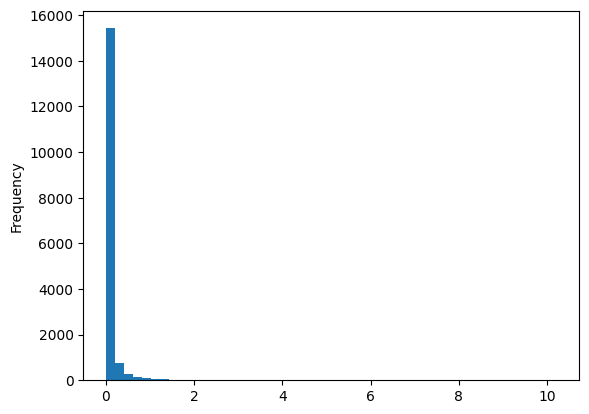

In [47]:
#pengecekan outlier
df['JP Sales'].plot(kind='hist',bins=50)

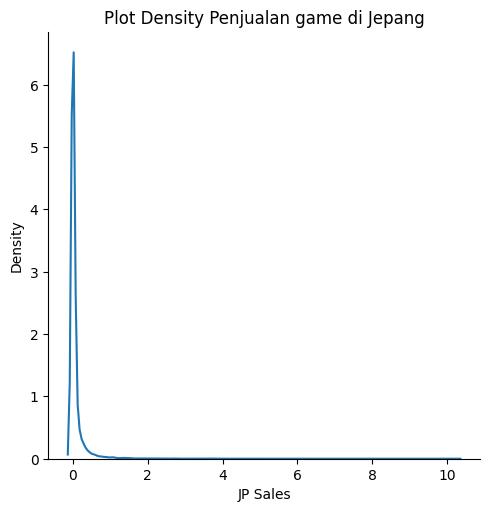

In [48]:
# Menampilkan plot density dari data penjualan JP
sns.displot(df, x="JP Sales", kind="kde")

# Judul plot
plt.title('Plot Density Penjualan game di Jepang')

plt.show()  # Menampilkan plot


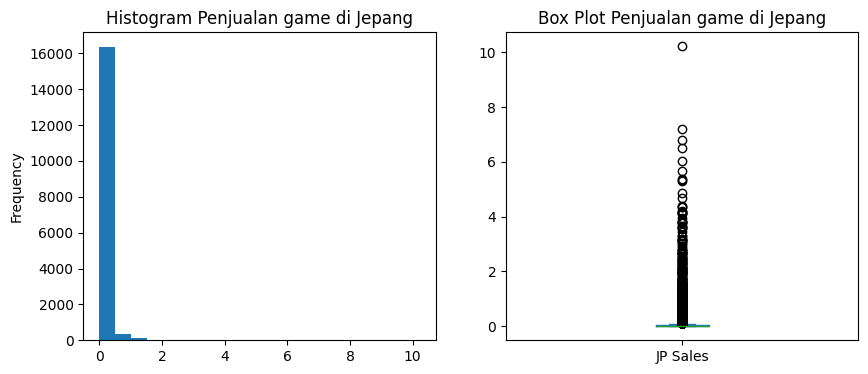

In [49]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# Menampilkan histogram penjualan JP
df['JP Sales'].plot(kind='hist',bins=20,ax=ax[0])
ax[0].set_title('Histogram Penjualan game di Jepang')  # Judul plot histogram

# Menampilkan box plot penjualan JP
df['JP Sales'].plot(kind='box',ax=ax[1])
ax[1].set_title('Box Plot Penjualan game di Jepang')  # Judul plot box
plt.show()  # Menampilkan plot


In [50]:
# menentukan upper dan lower boundary dari price
q1 = df['JP Sales'].quantile(0.25)
q3 = df['JP Sales'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 0.10
Lower Boundary: -0.06


In [51]:
# menampilkan outlier data price
outlier = df['JP Sales'][(df['JP Sales']<low_bound) | (df['JP Sales']>up_bound)]

outlier

0         3.77
1         6.81
2         3.79
3         3.28
4        10.22
         ...  
16889     0.11
16890     0.61
16901     0.22
16925     0.42
16927     0.60
Name: JP Sales, Length: 2479, dtype: float64

In [21]:
outlier = df['JP Sales'][(df['JP Sales']<low_bound) | (df['JP Sales']>up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["JP Sales"]):.2f}%%')

Percentage of outliers: 22.26%%


***Insight Statistik Deskriptif***

***Central Tendency:***

- Rata-rata (mean) dari penjualan game di Jepang adalah sekitar 0.078 juta dolar.
- Median adalah 0.0 juta dolar, yang menunjukkan bahwa setengah dari data memiliki penjualan kurang dari atau sama dengan 0.0 juta dolar.
- Mode juga 0.0 juta dolar, yang menunjukkan bahwa nilai 0.0 juta dolar muncul paling sering dalam data.

***Measure of Variance:***

- Standar deviasi (std) adalah sekitar 0.309 juta dolar. Ini menunjukkan sebaran data dari rata-rata. Dengan nilai yang relatif tinggi, ini menunjukkan variasi yang cukup besar dalam penjualan game di Jepang.
- Kurtosis yang tinggi (192.187) menunjukkan ekor yang berat dalam distribusi, yang dapat menunjukkan adanya outlier atau penyebaran ekstrim dalam data.
- Skewness yang tinggi (11.118) menunjukkan bahwa distribusi data cenderung condong ke kanan (positif skewness), yang berarti sebagian besar nilai lebih rendah dari rata-rata.

***Outlier Analysis:***

- Upper boundary adalah 0.10 juta dolar dan lower boundary adalah -0.06 juta dolar. Ini menunjukkan rentang di mana sebagian besar data berada.
- Dengan 22.26% dari data dianggap sebagai outlier, hal ini menunjukkan bahwa ada sejumlah besar nilai yang jauh dari nilai-nilai yang diharapkan atau normal dalam distribusi.

***Distribution:***

- Distribusi data tampaknya tidak normal (dapat dilihat dari nilai skewness yang tinggi dan kurtosis yang tinggi). Ini menunjukkan bahwa ada kemungkinan adanya faktor-faktor lain yang memengaruhi penjualan game di Jepang yang tidak terdistribusi secara normal.

### Insight Statistika Inferensial

bagian ini akan dijawab pertanyaan 5W + 1H yaitu <br>
Mana yang lebih baik, penjualan di america atau europa ?<br>

pertanyaan akan dijawab dengan menggunakan statistik inferential <br>
kemudian dijelaskan dengan hypothesis testing : two sample independent


langakah awal adalah menghitung rata rata penjualan di region North America atau NA dan Europe atau EU <br>

lalu menentukan hipotesis dari permasalahan <br>
H0 : apakah penjualan game di NA lebih rendah atau sama dengan EU <br>
H1 : apakah pemjualan game di NA lebih tinggi dari EU

In [25]:
# Menyaring data berdasarkan NA dan EU
NA = df['NA Sales']
EU = df['EU Sales']

# Hitung rata-rata penjualan game
rata_rata_penjualan_na = NA.mean()
rata_rata_penjualan_eu = EU.mean()

# Cetak hasilnya
print('Rata-rata penjualan North America =', rata_rata_penjualan_na)
print('Rata-rata penjualan untuk European Union =', rata_rata_penjualan_eu)

Rata-rata penjualan North America = 0.3215974219137333
Rata-rata penjualan untuk European Union = 0.18443926623698564


In [33]:
# Pilih data penjualan untuk NA dan EU
penjualan_na = df['NA Sales']
penjualan_eu = df['EU Sales']

# Lakukan uji-t
statistik_t, nilai_p = stats.ttest_ind(penjualan_na, penjualan_eu)

# Cetak hasilnya
print("statistik t:", statistik_t)
print("nilai p:", nilai_p)

alpha = 0.05  # Tingkat signifikansi

if nilai_p < alpha:
    print("Tolak hipotesis nol (H0). Ada bukti yang cukup untuk menyatakan bahwa penjualan game di NA lebih tinggi dari EU.")
else:
    print("Gagal tolak hipotesis nol (H0). Tidak cukup bukti untuk menyatakan bahwa penjualan game di NA lebih tinggi dari EU.")

statistik t: 13.649744887530565
nilai p: 3.121316671594553e-42
Tolak hipotesis nol (H0). Ada bukti yang cukup untuk menyatakan bahwa penjualan game di NA lebih tinggi dari EU.



**Perhitungan Rata-Rata:** 

setelah menghitung rata-rata penjualan di NA dan EU, Rata-rata penjualan di NA adalah 0.3215974219137333, sedangkan di EU adalah 0.18443926623698564.

**Perhitungan Statistik T dan Nilai p:** 

setelah menghitung nilai statistik t dan nilai p. Nilai t yang diperoleh adalah 13.649744887530565, dan nilai p adalah 3.121316671594553e-42.

**Kesimpulan hipotesis:** 

dapat menyimpulkan bahwa menolak hipotesis nol (H0) karena nilai p sangat kecil. Ini berarti ada cukup bukti untuk menyatakan bahwa penjualan game di NA lebih tinggi dari EU.
